In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
os.chdir("D:/edwisor/Projects/Churn Reduction")

In [3]:
train = pd.read_csv("D:/edwisor/Projects/Churn Reduction/train_data.csv")

In [4]:
test = pd.read_csv("D:/edwisor/Projects/Churn Reduction/test_data.csv")

# Assigning levels to data sets

In [5]:
#assigning levels to categorical varibales of train dataset

for i in range(0, train.shape[1]):

    if(train.iloc[:,i].dtypes == 'object'):

        train.iloc[:,i] = pd.Categorical(train.iloc[:,i])

        train.iloc[:,i] = train.iloc[:,i].cat.codes

        

In [6]:
#assigning levels to categorical varibales of test dataset

for i in range(0, test.shape[1]):

    if(test.iloc[:,i].dtypes == 'object'):

        test.iloc[:,i] = pd.Categorical(test.iloc[:,i])

        test.iloc[:,i] = test.iloc[:,i].cat.codes

        

In [7]:
#storing target variable

train_target = train.Churn

test_target = test.Churn

In [8]:
combined = train.append(test)

# Checking data types of variables and converting

In [9]:
combined.dtypes

state                               int8
account length                     int64
area code                          int64
phone number                       int16
international plan                  int8
voice mail plan                     int8
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                               int8
dtype: object

In [10]:
 combined['area code'] = combined['area code'].astype('object')

# Checking relationship of target variable 'Churn' with 'State' 


In [ ]:
y = combined["Churn"].value_counts()

sns.barplot(y.index, y.values)

In [ ]:
combined.groupby(["state", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

## Missing Value Analysis

In [39]:
missing_val = pd.DataFrame(combined.isnull().sum())

In [40]:
missing_val

,0
state,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total eve minutes,0
total eve calls,0
total night minutes,0


## Future selection

In [11]:
#save numeric names
cnames =  ["account length", "number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge",
           "total intl minutes", "total intl calls", "total intl charge", "number customer service calls"]

In [12]:
##Correlation analysis
#Correlation plot
df_corr = combined.loc[:,cnames]

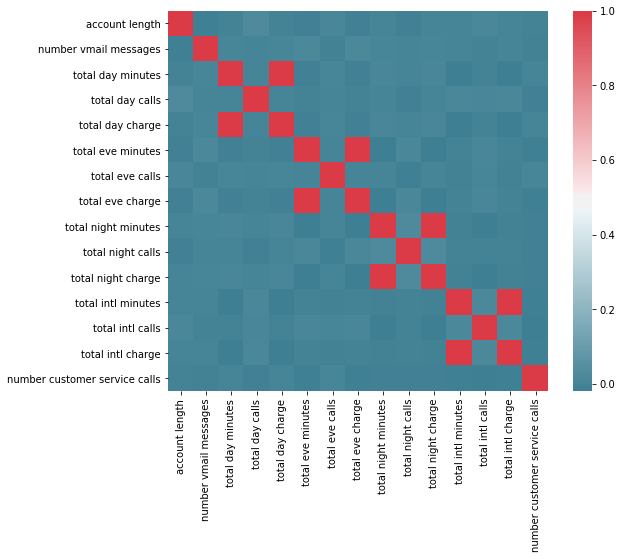

In [13]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(9, 7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["area code", "state", "phone number", "international plan", "voice mail plan"]

In [15]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(combined['Churn'], combined[i]))
    print(p)

area code
0.7546581385329686
state
7.850836224371827e-05
phone number
0.7892627381002844
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [16]:
combined = combined.drop(['area code','total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'phone number', 'Churn'], axis=1)

## Future scaling

(array([ 18.,   0., 160.,   0.,   0., 489.,   0., 668.,   0.,   0., 619.,
          0., 472.,   0.,   0., 336.,   0., 218.,   0.,   0., 116.,   0.,
        109.,   0.,   0.,  50.,   0.,  28.,   0.,   0.,  15.,   0.,  14.,
          0.,   0.,   6.,   0.,   7.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   3.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <a list of 50 Patch objects>)

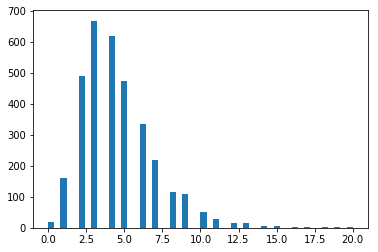

In [17]:
#Normality check
%matplotlib inline  
plt.hist(train['total intl calls'], bins='auto')

In [18]:
#save numeric names
cnames_1 =  ["account length", "number vmail messages", "total day minutes", "total day calls", "total eve minutes", "total eve calls", "total night minutes", "total night calls", 
           "total intl minutes", "total intl calls", "number customer service calls"]

In [19]:
#Nomalisation
for i in cnames_1:
    print(i)
    combined[i] = (combined[i] - min(combined[i]))/(max(combined[i]) - min(combined[i]))

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


## Model development

In [20]:
#Import Libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import tree

C:\Users\Q6IH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
train = combined[:3333]

test = combined[3333:]

In [22]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(train, train_target)

#predict new test cases
C50_Predictions = C50_model.predict(test)

In [23]:
#testing accuracy and to build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(test_target, C50_Predictions)

#check accuracy of model
accuracy_score(test_target, C50_Predictions)*100
#91.96

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 92.44#
#FNR: 30.35#

92.44151169766047

In [24]:
CM

array([[1385,   58],
       [  68,  156]], dtype=int64)

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(train, train_target)

In [26]:
RF_Predictions = RF_model.predict(test)

In [27]:
CM_RF = confusion_matrix(test_target, RF_Predictions)
accuracy_score(test_target, RF_Predictions)*100

#Accuracy 94.54%
#FNR 37.94%

94.54109178164367

In [28]:
CM_RF

array([[1437,    6],
       [  85,  139]], dtype=int64)

In [30]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(train, train_target)

In [31]:
#predict test cases
KNN_Predictions = KNN_model.predict(test)

In [32]:
#build confusion matrix
CM_kNN = confusion_matrix(test_target, KNN_Predictions)
accuracy_score(test_target, KNN_Predictions)*100
#CM = pd.crosstab(y_test, KNN_Predictions)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 86.80%
#FNR: 95.98%

86.80263947210558

In [33]:
CM_kNN

array([[1438,    5],
       [ 215,    9]], dtype=int64)

In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(train, train_target)

In [35]:
#predict test cases
NB_Predictions = NB_model.predict(test)

In [36]:
#build confusion matrix
CM_NB = confusion_matrix(test_target, NB_Predictions)
accuracy_score(test_target, NB_Predictions)*100

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 85.84
#FNR: 60.26

85.84283143371326

In [37]:
CM_NB

array([[1342,  101],
       [ 135,   89]], dtype=int64)

In [1]:
#I will fix Decision Tree model for this dataset because it is giving us low FNR and high accuracy.
Predict = pd.DataFrame(C50_Predictions)
Predict = Predict.rename(columns = {0:'Predictions'})
test = test.join(Predict['Predictions'])



NameError: name 'pd' is not defined

In [ ]:
test.to_csv("output.csv", index = False)